In [317]:
#Core Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
#Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras 
#from kerastuner.tuners import RandomSearch

In [318]:
#defaults
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

plt.rc('axes', linewidth = 2 )
plt.rc('lines', linewidth = 2 )

plt.rc('lines', markersize = 2 )

plt.rc('figure', figsize=(8,4) )         # Image size

In [319]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [320]:
tf.__version__

'2.3.1'

In [321]:
tf.test.is_built_with_cuda()

True

In [322]:
#read data
data=pd.read_csv(r'C:\Users\dour-andish\Downloads\data3.csv')
data.head()

,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
0,-0.021041,0.023742,0.023742,-0.038561,-0.004959,-0.004959,-0.001887,0.000753,0.000753,-0.000958,...,0.026859,0.039786,0.043018,0.048287,0.024183,0.049447,0.049431,0.016259,0.094563,0.013130
1,-0.046401,-0.399450,-0.060308,0.072807,0.052736,0.052736,0.020391,-0.012746,0.013788,0.007481,...,0.020903,0.041728,0.023034,0.042636,0.005672,0.004000,-0.000419,0.049419,0.016770,-0.025156
2,-0.518300,-0.066743,-0.012237,0.006246,-0.005730,0.000644,-0.000662,-0.003766,0.002979,-0.003071,...,2.978900,3.242300,3.039000,2.770900,2.772700,2.976400,2.975000,2.767200,2.194700,1.809100
3,-0.646090,-0.573930,-0.197930,0.482210,-0.056624,-0.018140,0.004955,0.016764,-0.003095,-0.004239,...,2.953200,3.140500,2.941100,2.674300,2.677500,3.047000,3.235400,2.945800,2.356300,1.784000
4,-0.021914,0.257430,-0.171310,-0.099792,0.403340,0.171440,0.027042,0.033130,-0.026006,0.001418,...,0.119830,0.129200,0.090628,0.104630,0.109740,0.089928,0.069107,0.088742,0.062244,0.090062


In [323]:
#the shape of the dataset
print(f'our dataset has {data.shape[0]+1} rows and {data.shape[1]} columns.')

our dataset has 10000 rows and 288 columns.


In [324]:
#describe data (get some statistics from the data set, count, mean, etc) / check for null and...
print(data.isnull().sum())
print('-'*70)
data.describe()

1      0
2      0
3      0
4      0
5      0
      ..
284    0
285    0
286    0
287    0
288    0
Length: 288, dtype: int64
----------------------------------------------------------------------


,1,2,3,4,5,6,7,8,9,10,...,279,280,281,282,283,284,285,286,287,288
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.104280,0.008931,0.001431,-0.001642,-0.001254,-0.000136,0.000595,0.000033,0.000059,0.000126,...,0.888512,0.890669,0.892584,0.892080,0.891068,0.889894,0.889681,0.892438,0.896441,0.897707
std,0.452694,0.302206,0.220081,0.159484,0.110354,0.077335,0.052932,0.036088,0.022728,0.014983,...,1.107675,1.109046,1.114513,1.125156,1.139405,1.160601,1.195889,1.271414,1.394755,1.534952
min,-1.355500,-1.320000,-1.108100,-0.932250,-0.995510,-0.629060,-0.791650,-0.565610,-0.459440,-0.299460,...,-0.055288,-0.044946,-0.053287,-0.047617,-0.053684,-0.069617,-0.062240,-0.051724,-0.052889,-0.049674
25%,-0.195040,-0.155530,-0.095903,-0.060218,-0.031635,-0.016737,-0.008487,-0.004686,-0.003120,-0.002481,...,0.088609,0.082884,0.080955,0.076410,0.072843,0.070993,0.070050,0.066706,0.066547,0.064365
50%,0.055473,0.001979,0.000881,-0.000916,-0.000171,0.000275,0.000043,-0.000043,0.000024,-0.000009,...,0.351520,0.356020,0.368760,0.342290,0.277730,0.235990,0.207950,0.189210,0.176000,0.169710
75%,0.375075,0.163630,0.099749,0.053678,0.030488,0.016541,0.008657,0.004566,0.003286,0.002488,...,1.416950,1.459150,1.458300,1.460400,1.473750,1.467350,1.610050,1.500900,1.034450,0.802230
max,1.561900,1.268200,1.249500,1.047600,0.832830,0.775190,0.648890,0.540980,0.268310,0.294130,...,8.220800,6.655400,7.158300,7.686900,8.524200,8.926400,8.787100,8.813800,10.230000,12.751000


In [325]:
X=data.iloc[:,0:32]
Y=data.iloc[:,32:]
print(f'The shape of our input is : {X.shape}')
print(f'The shape of our output is : {Y.shape}')

The shape of our input is : (9999, 32)
The shape of our output is : (9999, 256)


In [326]:
#scaling (StandardScaler ,MinMaxScaler and RobustScaler)
scaler = StandardScaler()
scaler_1=MinMaxScaler()
scaler_2=RobustScaler()
X_scaled = scaler.fit_transform(X) 
X_sscaled = scaler_1.fit_transform(X_scaled) 
X_ssscaled = scaler_2.fit_transform(X_sscaled)

Y_scaled = scaler.fit_transform(Y)
Y_sscaled = scaler_1.fit_transform(Y_scaled)  
Y_ssscaled = scaler_2.fit_transform(Y_sscaled)

In [327]:
#split data into train-test set (67% training and 33% testing data)
X_train,X_test,Y_train,Y_test=train_test_split(X_sscaled,Y_sscaled,test_size=0.33,random_state=42)
print(f'The shape of X_train is : {X_train.shape}')
print(70*'-')
print(f'The shape of X_test  is : {X_test.shape}')
print(70*'-')
print(f'The shape of Y_train is : {Y_train.shape}')
print(70*'-')
print(f'The shape of Y_test is : {Y_test.shape}')

The shape of X_train is : (6699, 32)
----------------------------------------------------------------------
The shape of X_test  is : (3300, 32)
----------------------------------------------------------------------
The shape of Y_train is : (6699, 256)
----------------------------------------------------------------------
The shape of Y_test is : (3300, 256)


In [155]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.00012 - batch size : 100)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.00012),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=100,validation_data=(X_test,Y_test))
    

Epoch 1/40
67/67 [==============================] - 2s 23ms/step - loss: 0.0226 - root_mean_squared_error: 0.1503 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1373
Epoch 2/40
67/67 [==============================] - 1s 17ms/step - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 3/40
67/67 [==============================] - 1s 22ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 4/40
67/67 [==============================] - 2s 31ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 5/40
67/67 [==============================] - 1s 18ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 6/40
67/67 [==============================] - 2s 31ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_m

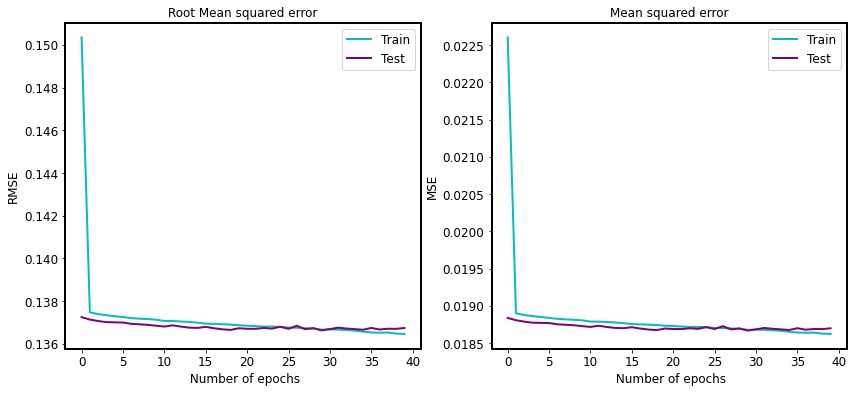

In [156]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='c')
plt.plot(history.history['val_root_mean_squared_error'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='c')
plt.plot(history.history['val_loss'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [163]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.00012 - batch size : 1)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.00012),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=1,validation_data=(X_test,Y_test))

Epoch 1/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0191 - root_mean_squared_error: 0.1381 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1373
Epoch 2/40
6699/6699 [==============================] - 26s 4ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 3/40
6699/6699 [==============================] - 29s 4ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 4/40
6699/6699 [==============================] - 30s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 5/40
6699/6699 [==============================] - 31s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 6/40
6699/6699 [==============================] - 30s 4ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_l

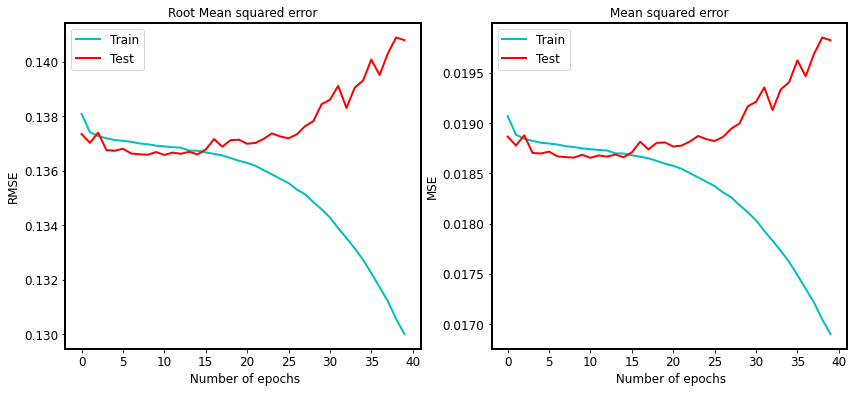

In [164]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='c')
plt.plot(history.history['val_root_mean_squared_error'],color='r')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='c')
plt.plot(history.history['val_loss'],color='r')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [165]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.00012 - batch size : 10)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.00012),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=10,validation_data=(X_test,Y_test))

Epoch 1/40
670/670 [==============================] - 4s 6ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 2/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 3/40
670/670 [==============================] - 4s 5ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 4/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 5/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 6/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0187 - val_

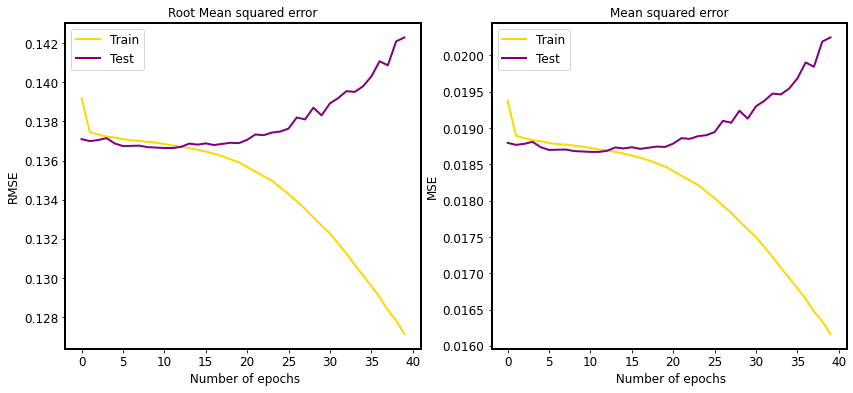

In [166]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='gold')
plt.plot(history.history['val_root_mean_squared_error'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='gold')
plt.plot(history.history['val_loss'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [167]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.001 - batch size : 100)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.001),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=100,validation_data=(X_test,Y_test))

Epoch 1/40
67/67 [==============================] - 1s 10ms/step - loss: 0.0197 - root_mean_squared_error: 0.1404 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 2/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 3/40
67/67 [==============================] - 1s 10ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 4/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 5/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 6/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0188 - val_root_mean_

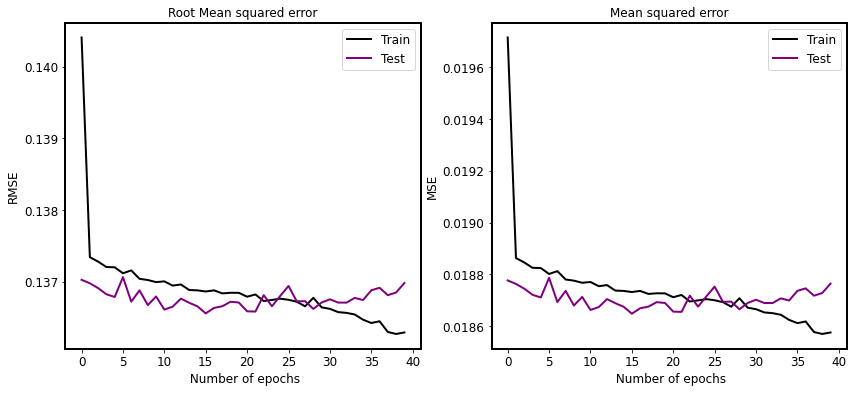

In [168]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='k')
plt.plot(history.history['val_root_mean_squared_error'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='k')
plt.plot(history.history['val_loss'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [169]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.001 - batch size : 1)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.001),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=1,validation_data=(X_test,Y_test))

Epoch 1/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1372
Epoch 2/40
6699/6699 [==============================] - 30s 4ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 3/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 4/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 5/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1372
Epoch 6/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_l

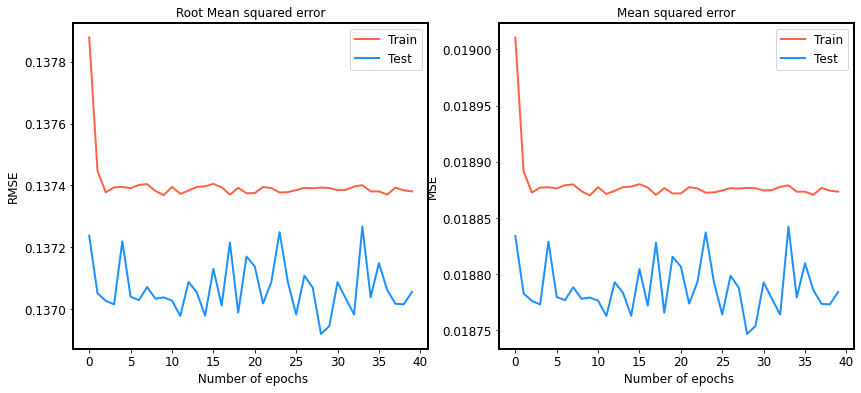

In [170]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='tomato')
plt.plot(history.history['val_root_mean_squared_error'],color='dodgerblue')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='tomato')
plt.plot(history.history['val_loss'],color='dodgerblue')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [171]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.001 - batch size : 10)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.001),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=10,validation_data=(X_test,Y_test))

Epoch 1/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0191 - root_mean_squared_error: 0.1380 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1372
Epoch 2/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 3/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 4/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 5/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 6/40
670/670 [==============================] - 4s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_

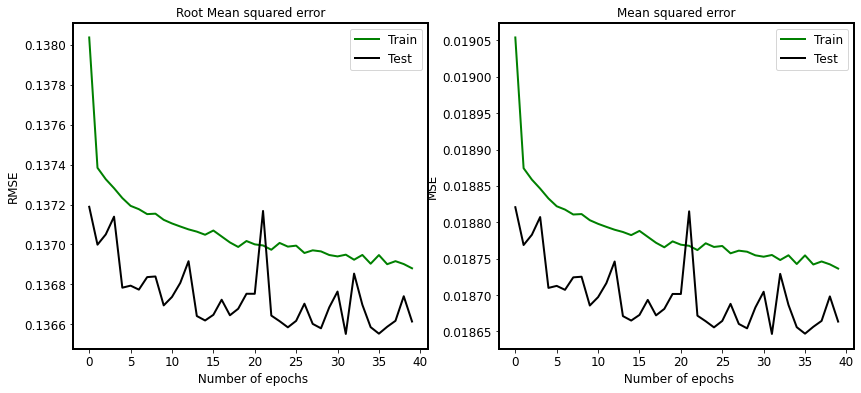

In [172]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='green')
plt.plot(history.history['val_root_mean_squared_error'],color='k')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='k')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [173]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.01 - batch size : 100)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.01),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=100,validation_data=(X_test,Y_test))

Epoch 1/40
67/67 [==============================] - 1s 11ms/step - loss: 0.0238 - root_mean_squared_error: 0.1542 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 2/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 3/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 4/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 5/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 6/40
67/67 [==============================] - 1s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_s

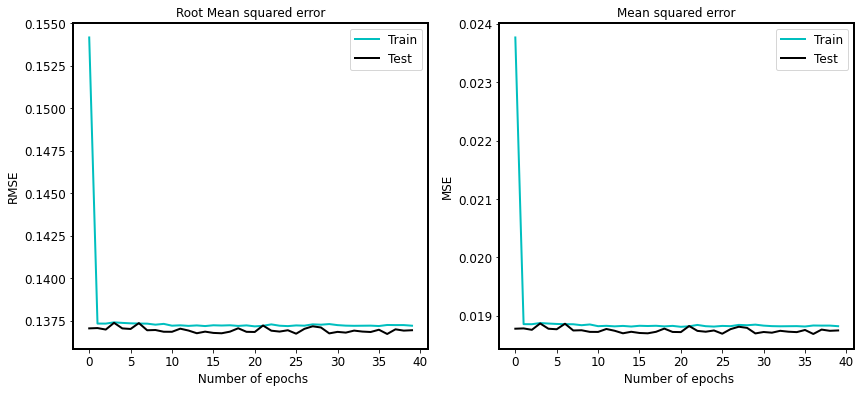

In [174]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='c')
plt.plot(history.history['val_root_mean_squared_error'],color='k')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='c')
plt.plot(history.history['val_loss'],color='k')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [175]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.01 - batch size : 1)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.01),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=1,validation_data=(X_test,Y_test))

Epoch 1/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0196 - root_mean_squared_error: 0.1399 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1407
Epoch 2/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1401
Epoch 3/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1400
Epoch 4/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 5/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381
Epoch 6/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_l

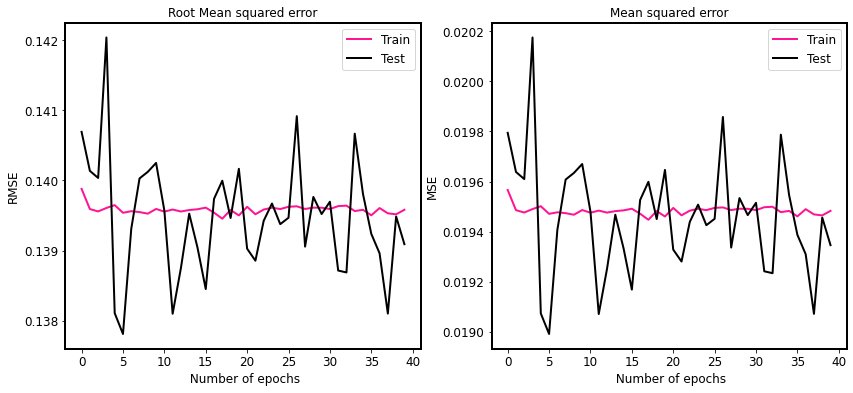

In [176]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='deeppink')
plt.plot(history.history['val_root_mean_squared_error'],color='k')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='deeppink')
plt.plot(history.history['val_loss'],color='k')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [177]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.01 - batch size : 10)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.01),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=10,validation_data=(X_test,Y_test))

Epoch 1/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0195 - root_mean_squared_error: 0.1395 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 2/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1377
Epoch 3/40
670/670 [==============================] - 4s 6ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 4/40
670/670 [==============================] - 4s 6ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1375
Epoch 5/40
670/670 [==============================] - 4s 6ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1373
Epoch 6/40
670/670 [==============================] - 4s 6ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0188 - val_

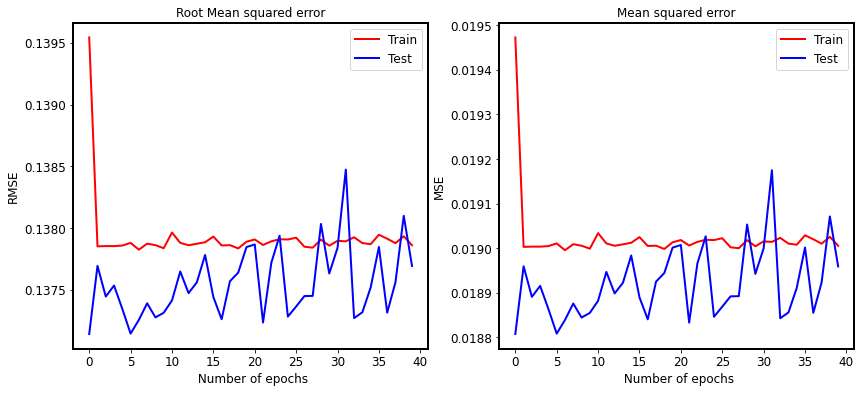

In [178]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='r')
plt.plot(history.history['val_root_mean_squared_error'],color='b')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [179]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.1 - batch size : 100)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.1),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=100,validation_data=(X_test,Y_test))

Epoch 1/40
67/67 [==============================] - 1s 10ms/step - loss: 20041.3633 - root_mean_squared_error: 141.5675 - val_loss: 0.3169 - val_root_mean_squared_error: 0.5629
Epoch 2/40
67/67 [==============================] - 1s 9ms/step - loss: 0.3021 - root_mean_squared_error: 0.5497 - val_loss: 0.2838 - val_root_mean_squared_error: 0.5327
Epoch 3/40
67/67 [==============================] - 1s 9ms/step - loss: 0.2644 - root_mean_squared_error: 0.5142 - val_loss: 0.2441 - val_root_mean_squared_error: 0.4941
Epoch 4/40
67/67 [==============================] - 1s 9ms/step - loss: 0.2246 - root_mean_squared_error: 0.4739 - val_loss: 0.2046 - val_root_mean_squared_error: 0.4523
Epoch 5/40
67/67 [==============================] - 1s 9ms/step - loss: 0.1863 - root_mean_squared_error: 0.4316 - val_loss: 0.1679 - val_root_mean_squared_error: 0.4097
Epoch 6/40
67/67 [==============================] - 1s 9ms/step - loss: 0.1516 - root_mean_squared_error: 0.3893 - val_loss: 0.1354 - val_root_

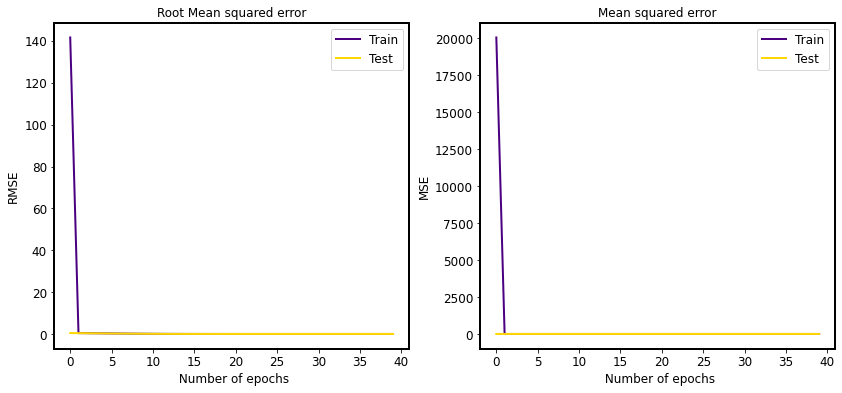

In [180]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='indigo')
plt.plot(history.history['val_root_mean_squared_error'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='indigo')
plt.plot(history.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [181]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.1 - batch size : 1)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.1),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=1,validation_data=(X_test,Y_test))

Epoch 1/40
6699/6699 [==============================] - 27s 4ms/step - loss: 244.5661 - root_mean_squared_error: 15.6386 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 2/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0221 - root_mean_squared_error: 0.1485 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1560
Epoch 3/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0248 - root_mean_squared_error: 0.1576 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 4/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0249 - root_mean_squared_error: 0.1578 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 5/40
6699/6699 [==============================] - 29s 4ms/step - loss: 0.0248 - root_mean_squared_error: 0.1574 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 6/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0249 - root_mean_squared_error: 0.1577 - va

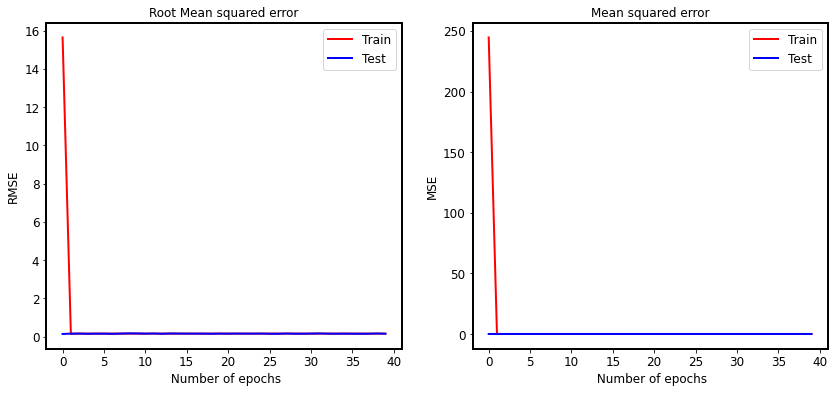

In [182]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='r')
plt.plot(history.history['val_root_mean_squared_error'],color='b')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [183]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 0.1 - batch size : 10)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=0.1),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=10,validation_data=(X_test,Y_test))

Epoch 1/40
670/670 [==============================] - 3s 5ms/step - loss: 2629.2100 - root_mean_squared_error: 51.2758 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2098
Epoch 2/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0260 - root_mean_squared_error: 0.1612 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1384
Epoch 3/40
670/670 [==============================] - 4s 5ms/step - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 4/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 5/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 6/40
670/670 [==============================] - 3s 5ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 - 

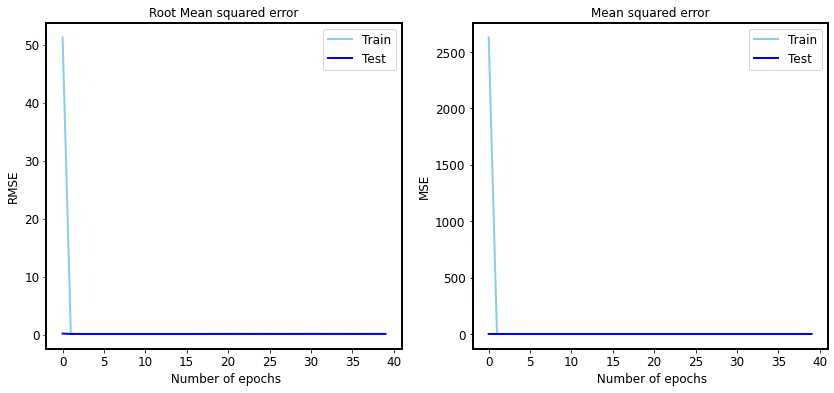

In [184]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='skyblue')
plt.plot(history.history['val_root_mean_squared_error'],color='b')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='skyblue')
plt.plot(history.history['val_loss'],color='b')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [185]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 1 - batch size : 100)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=1),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=100,validation_data=(X_test,Y_test))

Epoch 1/40
67/67 [==============================] - 1s 10ms/step - loss: 1926970867712.0000 - root_mean_squared_error: 1388153.7500 - val_loss: 1857.0507 - val_root_mean_squared_error: 43.0935
Epoch 2/40
67/67 [==============================] - 1s 9ms/step - loss: 481.8389 - root_mean_squared_error: 21.9508 - val_loss: 0.1497 - val_root_mean_squared_error: 0.3870
Epoch 3/40
67/67 [==============================] - 1s 9ms/step - loss: 0.1317 - root_mean_squared_error: 0.3629 - val_loss: 0.1265 - val_root_mean_squared_error: 0.3556
Epoch 4/40
67/67 [==============================] - 1s 9ms/step - loss: 0.1263 - root_mean_squared_error: 0.3554 - val_loss: 0.1261 - val_root_mean_squared_error: 0.3550
Epoch 5/40
67/67 [==============================] - 1s 10ms/step - loss: 0.1260 - root_mean_squared_error: 0.3549 - val_loss: 0.1257 - val_root_mean_squared_error: 0.3546
Epoch 6/40
67/67 [==============================] - 1s 9ms/step - loss: 0.1256 - root_mean_squared_error: 0.3545 - val_loss

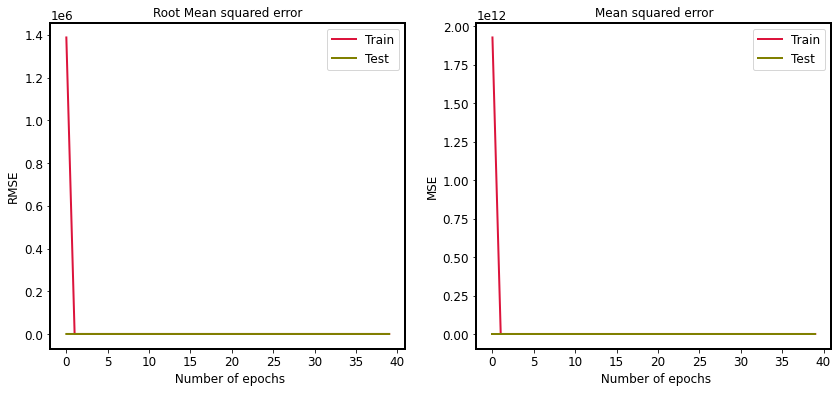

In [186]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='crimson')
plt.plot(history.history['val_root_mean_squared_error'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='crimson')
plt.plot(history.history['val_loss'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [187]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 1 - batch size : 1)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=1),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=1,validation_data=(X_test,Y_test))

Epoch 1/40
6699/6699 [==============================] - 29s 4ms/step - loss: 18835841024.0000 - root_mean_squared_error: 137243.7344 - val_loss: 0.0971 - val_root_mean_squared_error: 0.3115
Epoch 2/40
6699/6699 [==============================] - 26s 4ms/step - loss: 0.1133 - root_mean_squared_error: 0.3366 - val_loss: 0.0817 - val_root_mean_squared_error: 0.2858
Epoch 3/40
6699/6699 [==============================] - 26s 4ms/step - loss: 1.5264 - root_mean_squared_error: 1.2355 - val_loss: 1.6219 - val_root_mean_squared_error: 1.2736
Epoch 4/40
6699/6699 [==============================] - 28s 4ms/step - loss: 0.3577 - root_mean_squared_error: 0.5981 - val_loss: 0.0608 - val_root_mean_squared_error: 0.2466
Epoch 5/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0615 - root_mean_squared_error: 0.2479 - val_loss: 0.0609 - val_root_mean_squared_error: 0.2467
Epoch 6/40
6699/6699 [==============================] - 27s 4ms/step - loss: 0.0618 - root_mean_squared_error:

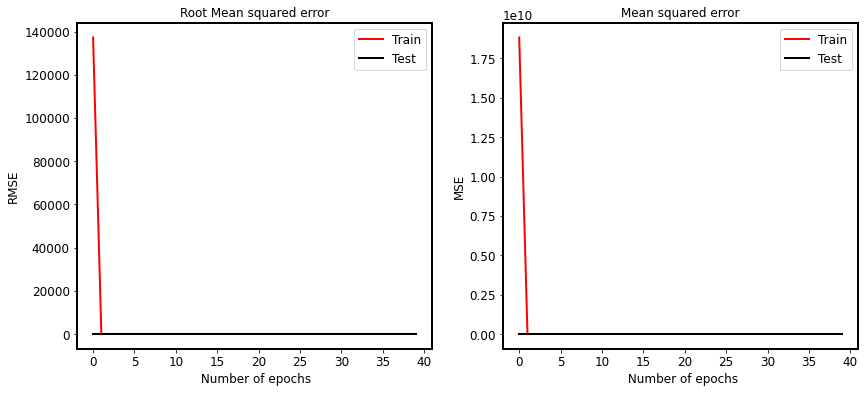

In [188]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='r')
plt.plot(history.history['val_root_mean_squared_error'],color='k')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='k')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [189]:
#Applying simple neural network (5 layers- Adam optimizer - learning rate : 1 - batch size : 10)
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,)),
            keras.layers.Dense(756, activation='relu'),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(384, activation='relu'),
            keras.layers.Dense(256, activation='linear'),
            
        ])

model.compile(keras.optimizers.Adam(lr=1),
                  loss='mse',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])


  
history=model.fit(X_train, Y_train, epochs=40,batch_size=10,validation_data=(X_test,Y_test))

Epoch 1/40
670/670 [==============================] - 4s 5ms/step - loss: 106222256128.0000 - root_mean_squared_error: 325917.5625 - val_loss: 19.5496 - val_root_mean_squared_error: 4.4215
Epoch 2/40
670/670 [==============================] - 4s 6ms/step - loss: 19.4853 - root_mean_squared_error: 4.4142 - val_loss: 19.4112 - val_root_mean_squared_error: 4.4058
Epoch 3/40
670/670 [==============================] - 4s 6ms/step - loss: 19.3089 - root_mean_squared_error: 4.3942 - val_loss: 19.1943 - val_root_mean_squared_error: 4.3811
Epoch 4/40
670/670 [==============================] - 4s 6ms/step - loss: 19.0452 - root_mean_squared_error: 4.3641 - val_loss: 18.8797 - val_root_mean_squared_error: 4.3451
Epoch 5/40
670/670 [==============================] - 4s 6ms/step - loss: 18.6705 - root_mean_squared_error: 4.3209 - val_loss: 18.4392 - val_root_mean_squared_error: 4.2941
Epoch 6/40
670/670 [==============================] - 4s 6ms/step - loss: 18.1523 - root_mean_squared_error: 4.2606

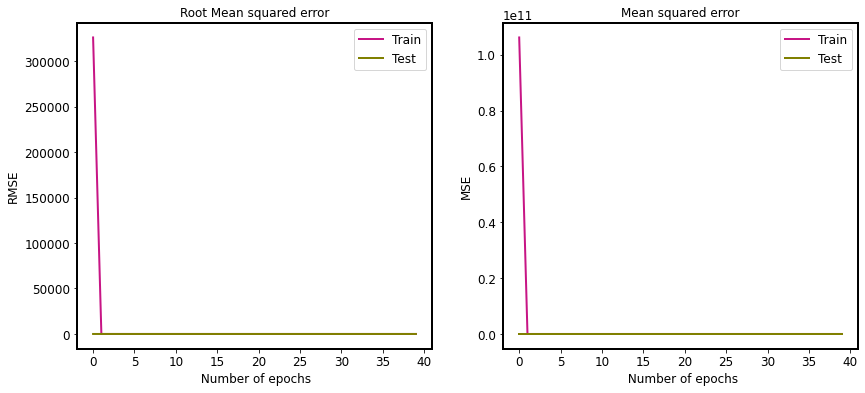

In [190]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history.history['root_mean_squared_error'],color='mediumvioletred')
plt.plot(history.history['val_root_mean_squared_error'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='mediumvioletred')
plt.plot(history.history['val_loss'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [209]:
#Applying simple neural network (5 layers, SGD, learning rate : 0.01 , batch size : 100)
model_1=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,)),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(384,activation='relu'),
                        keras.layers.Dense(256,activation='linear')
])


model_1.compile(
    keras.optimizers.SGD(lr=0.01),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])



history_1=model_1.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

Epoch 1/50
67/67 [==============================] - 0s 5ms/step - loss: 0.0401 - root_mean_squared_error: 0.2003 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1960
Epoch 2/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0373 - root_mean_squared_error: 0.1930 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1896
Epoch 3/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0351 - root_mean_squared_error: 0.1873 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1845
Epoch 4/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0334 - root_mean_squared_error: 0.1828 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1804
Epoch 5/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0321 - root_mean_squared_error: 0.1791 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1771
Epoch 6/50
67/67 [==============================] - 0s 4ms/step - loss: 0.0310 - root_mean_squared_error: 0.1760 - val_loss: 0.0304 - val_root_mean_sq

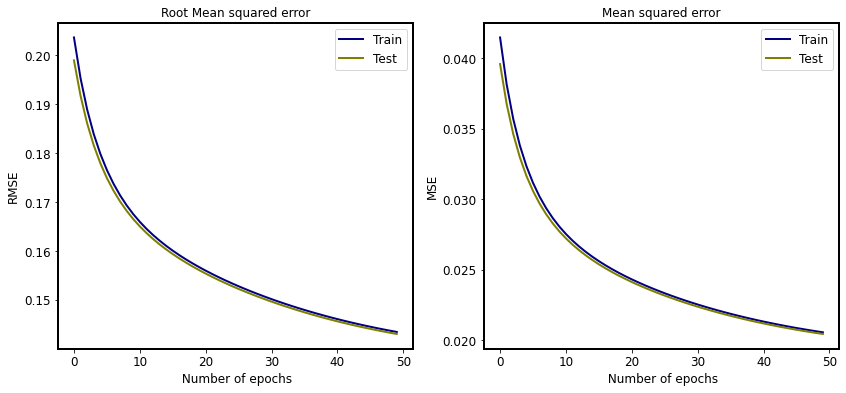

In [203]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_1.history['root_mean_squared_error'],color='navy')
plt.plot(history_1.history['val_root_mean_squared_error'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_1.history['loss'],color='navy')
plt.plot(history_1.history['val_loss'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [210]:
#Applying simple neural network (5 layers, SGD, learning rate : 0.001 , batch size : 10)
model_2=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,)),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(384,activation='relu'),
                        keras.layers.Dense(256,activation='linear')
])


model_2.compile(
    keras.optimizers.SGD(lr=0.001),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])



history_2=model_2.fit(
    X_train,Y_train,epochs=50,batch_size=10,validation_data=(X_test,Y_test)
)

Epoch 1/50
670/670 [==============================] - 1s 2ms/step - loss: 0.0456 - root_mean_squared_error: 0.2136 - val_loss: 0.0427 - val_root_mean_squared_error: 0.2067
Epoch 2/50
670/670 [==============================] - 2s 2ms/step - loss: 0.0407 - root_mean_squared_error: 0.2018 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1967
Epoch 3/50
670/670 [==============================] - 1s 2ms/step - loss: 0.0373 - root_mean_squared_error: 0.1931 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1892
Epoch 4/50
670/670 [==============================] - 1s 2ms/step - loss: 0.0349 - root_mean_squared_error: 0.1867 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1837
Epoch 5/50
670/670 [==============================] - 1s 2ms/step - loss: 0.0331 - root_mean_squared_error: 0.1818 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1795
Epoch 6/50
670/670 [==============================] - 1s 2ms/step - loss: 0.0317 - root_mean_squared_error: 0.1780 - val_loss: 0.0310 - val_

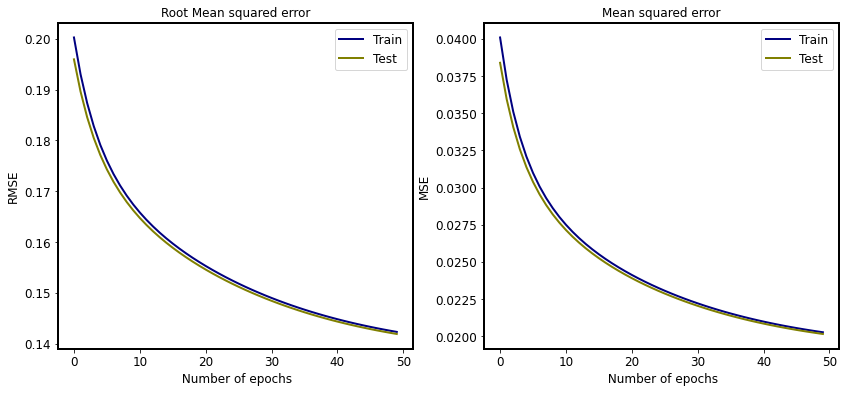

In [205]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_2.history['root_mean_squared_error'],color='navy')
plt.plot(history_2.history['val_root_mean_squared_error'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_2.history['loss'],color='navy')
plt.plot(history_2.history['val_loss'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [292]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6699, 32)
(6699, 256)
(3300, 32)
(3300, 256)


In [293]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [219]:
# Simple RNN
rnn =keras.Sequential([
                       keras.layers.SimpleRNN(512,input_shape=(1,32),activation='relu',return_sequences=True),
                       keras.layers.Dense(384,activation='relu'),
                       keras.layers.Dense(256,activation='linear')
])

rnn.compile(
    keras.optimizers.SGD(lr=.1),
    loss ='mean_squared_error', 
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
history_rnn=rnn.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

Epoch 1/50
67/67 [==============================] - 7s 104ms/step - loss: 0.0323 - root_mean_squared_error: 0.1797 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 2/50
67/67 [==============================] - 5s 82ms/step - loss: 0.0257 - root_mean_squared_error: 0.1602 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1552
Epoch 3/50
67/67 [==============================] - 6s 88ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
Epoch 4/50
67/67 [==============================] - 5s 81ms/step - loss: 0.0218 - root_mean_squared_error: 0.1475 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1453
Epoch 5/50
67/67 [==============================] - 6s 83ms/step - loss: 0.0208 - root_mean_squared_error: 0.1442 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1426
Epoch 6/50
67/67 [==============================] - 6s 92ms/step - loss: 0.0201 - root_mean_squared_error: 0.1419 - val_loss: 0.0198 - val_root_

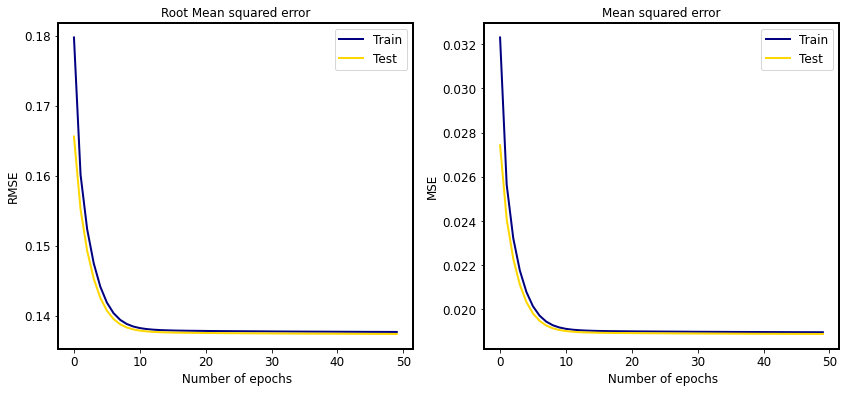

In [220]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_rnn.history['root_mean_squared_error'],color='navy')
plt.plot(history_rnn.history['val_root_mean_squared_error'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_rnn.history['loss'],color='navy')
plt.plot(history_rnn.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [222]:
#LSTM
lstm =keras.Sequential([
                       keras.layers.LSTM(512,input_shape=(1,32),activation='relu',return_sequences=True),
                       keras.layers.Dense(384,activation='relu'),
                       keras.layers.Dense(256,activation='linear')
])

lstm.compile(
    keras.optimizers.SGD(),
    loss ='mean_squared_error', 
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
history_lstm=lstm.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

Epoch 1/50
67/67 [==============================] - 5s 73ms/step - loss: 0.0319 - root_mean_squared_error: 0.1787 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1781
Epoch 2/50
67/67 [==============================] - 4s 64ms/step - loss: 0.0317 - root_mean_squared_error: 0.1780 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1774
Epoch 3/50
67/67 [==============================] - 4s 65ms/step - loss: 0.0315 - root_mean_squared_error: 0.1774 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1768
Epoch 4/50
67/67 [==============================] - 4s 66ms/step - loss: 0.0313 - root_mean_squared_error: 0.1768 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1762
Epoch 5/50
67/67 [==============================] - 4s 66ms/step - loss: 0.0310 - root_mean_squared_error: 0.1762 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1756
Epoch 6/50
67/67 [==============================] - 5s 68ms/step - loss: 0.0308 - root_mean_squared_error: 0.1756 - val_loss: 0.0306 - val_root_m

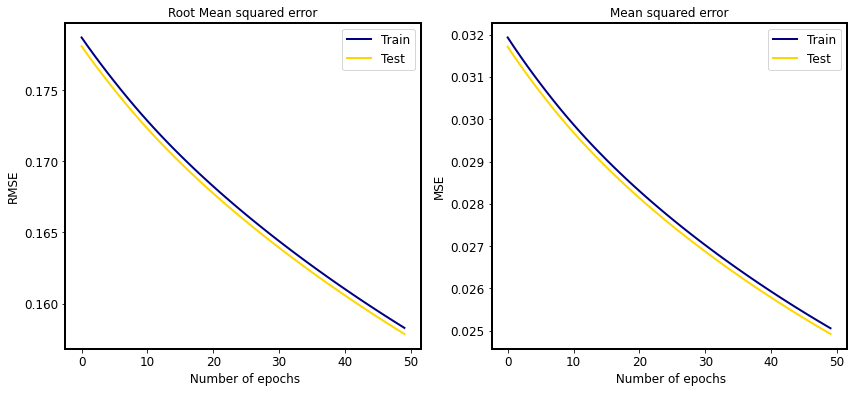

In [223]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_lstm.history['root_mean_squared_error'],color='navy')
plt.plot(history_lstm.history['val_root_mean_squared_error'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_lstm.history['loss'],color='navy')
plt.plot(history_lstm.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [294]:
#LSTM
lstm_1 =keras.Sequential([
                       keras.layers.LSTM(512,activation='tanh',return_sequences=True),
                       keras.layers.LSTM(512,activation='tanh',return_sequences=True),
                       keras.layers.LSTM(384,activation='sigmoid',return_sequences=True),
                       keras.layers.Dense(384,activation='sigmoid'),
                       keras.layers.Dense(256,activation='linear')
])

lstm_1.compile(
    keras.optimizers.SGD(),
    loss ='mean_squared_error', 
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
history_lstm_1=lstm_1.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

Epoch 1/50
67/67 [==============================] - 14s 204ms/step - loss: 0.2271 - root_mean_squared_error: 0.4766 - val_loss: 0.1331 - val_root_mean_squared_error: 0.3648
Epoch 2/50
67/67 [==============================] - 8s 118ms/step - loss: 0.0893 - root_mean_squared_error: 0.2988 - val_loss: 0.0577 - val_root_mean_squared_error: 0.2402
Epoch 3/50
67/67 [==============================] - 8s 118ms/step - loss: 0.0429 - root_mean_squared_error: 0.2070 - val_loss: 0.0321 - val_root_mean_squared_error: 0.1791
Epoch 4/50
67/67 [==============================] - 8s 114ms/step - loss: 0.0270 - root_mean_squared_error: 0.1644 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1527
Epoch 5/50
67/67 [==============================] - 8s 113ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1425
Epoch 6/50
67/67 [==============================] - 8s 115ms/step - loss: 0.0198 - root_mean_squared_error: 0.1406 - val_loss: 0.0193 - val

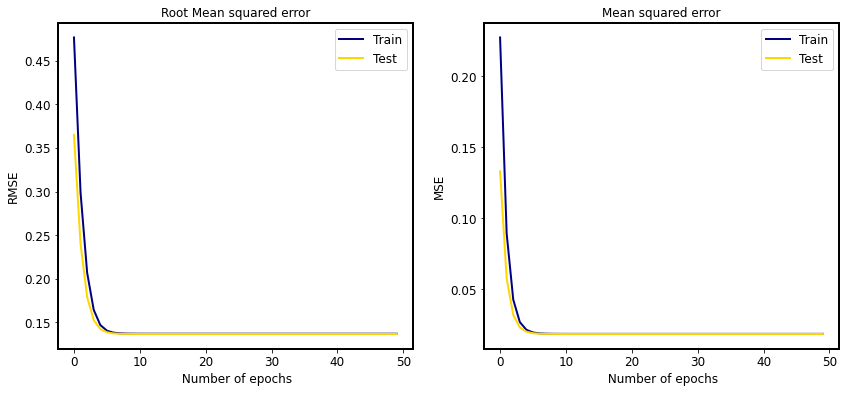

In [295]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_lstm_1.history['root_mean_squared_error'],color='navy')
plt.plot(history_lstm_1.history['val_root_mean_squared_error'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_lstm_1.history['loss'],color='navy')
plt.plot(history_lstm_1.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [224]:
#GRU
gru =keras.Sequential([
                       keras.layers.GRU(512,input_shape=(1,32),activation='relu',return_sequences=True),
                       keras.layers.Dense(384,activation='relu'),
                       keras.layers.Dense(256,activation='linear')
])

gru.compile(
    keras.optimizers.SGD(),
    loss ='mean_squared_error', 
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
history_gru=gru.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

Epoch 1/50
67/67 [==============================] - 4s 66ms/step - loss: 0.0325 - root_mean_squared_error: 0.1803 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1793
Epoch 2/50
67/67 [==============================] - 4s 56ms/step - loss: 0.0321 - root_mean_squared_error: 0.1791 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1782
Epoch 3/50
67/67 [==============================] - 4s 57ms/step - loss: 0.0317 - root_mean_squared_error: 0.1779 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1771
Epoch 4/50
67/67 [==============================] - 4s 59ms/step - loss: 0.0313 - root_mean_squared_error: 0.1768 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1760
Epoch 5/50
67/67 [==============================] - 4s 61ms/step - loss: 0.0309 - root_mean_squared_error: 0.1758 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1750
Epoch 6/50
67/67 [==============================] - 4s 59ms/step - loss: 0.0306 - root_mean_squared_error: 0.1749 - val_loss: 0.0303 - val_root_m

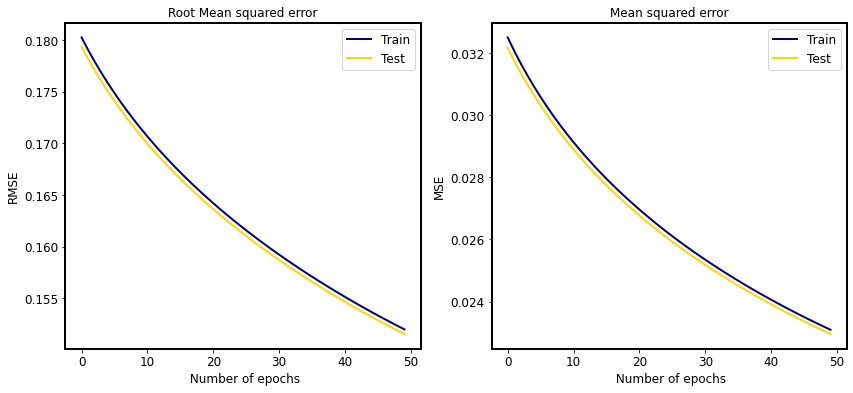

In [225]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_gru.history['root_mean_squared_error'],color='navy')
plt.plot(history_gru.history['val_root_mean_squared_error'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_gru.history['loss'],color='navy')
plt.plot(history_gru.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [308]:
X_train.shape


(6699, 32)

In [275]:
X_train = X_train.reshape(-1, X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[0],X_test.shape[1], 1)

In [311]:
X_train.shape

(6699, 32)

In [329]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [331]:
#CNN
cnn = keras.Sequential([
    keras.layers.Conv1D(512, 3, activation='relu', input_shape=(32,1)),

    keras.layers.Conv1D(384,3, activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(256, activation='linear')
])



cnn.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])


history_cnn = cnn.fit(X_train,Y_train, 
                    epochs=50, batch_size = 100,                    
                    validation_data = (X_test, Y_test) )

Epoch 1/50
67/67 [==============================] - 24s 363ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 2/50
67/67 [==============================] - 24s 353ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 3/50
67/67 [==============================] - 23s 344ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 4/50
67/67 [==============================] - 23s 343ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 5/50
67/67 [==============================] - 23s 349ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 6/50
67/67 [==============================] - 23s 350ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0187 

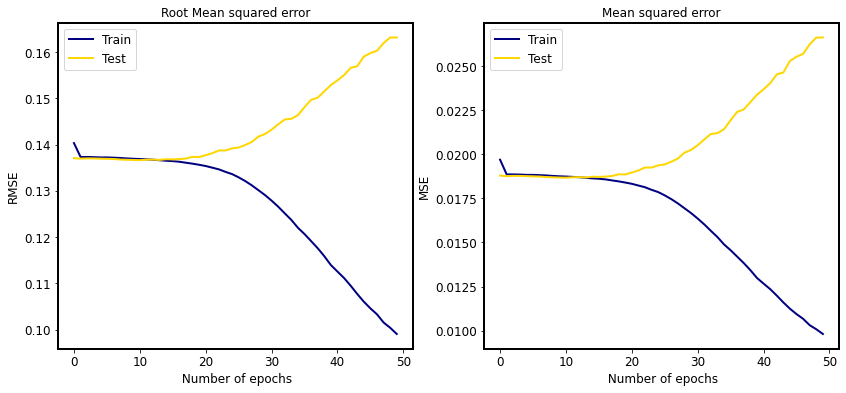

In [332]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_cnn.history['root_mean_squared_error'],color='navy')
plt.plot(history_cnn.history['val_root_mean_squared_error'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_cnn.history['loss'],color='navy')
plt.plot(history_cnn.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [335]:
#CNN
cnn_1= keras.Sequential([
    keras.layers.Conv1D(768, 3, activation='relu', input_shape=(32,1)),

    keras.layers.Conv1D(512,3, activation='relu'),
    keras.layers.Conv1D(384,3, activation='relu'),
    keras.layers.Conv1D(300,3, activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(256, activation='linear')
])



cnn_1.compile(keras.optimizers.Adam(lr=0.00012), 
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])


history_cnn_1 = cnn_1.fit(X_train,Y_train, 
                    epochs=20, batch_size = 100,                    
                    validation_data = (X_test, Y_test))

Epoch 1/20
67/67 [==============================] - 61s 913ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1376
Epoch 2/20
67/67 [==============================] - 64s 948ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 3/20
67/67 [==============================] - 63s 938ms/step - loss: 0.0189 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 4/20
67/67 [==============================] - 64s 951ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 5/20
67/67 [==============================] - 62s 929ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 6/20
67/67 [==============================] - 66s 979ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0188 

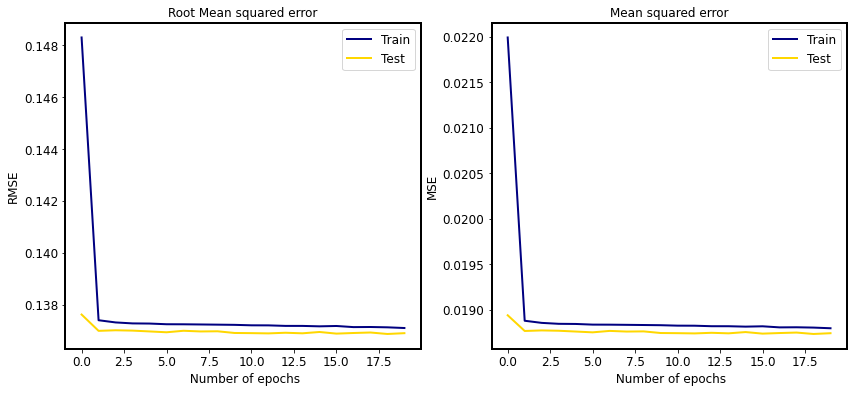

In [336]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1,title='Root Mean squared error', ylabel= 'RMSE',xlabel=' Number of epochs')
plt.plot(history_cnn_1.history['root_mean_squared_error'],color='navy')
plt.plot(history_cnn_1.history['val_root_mean_squared_error'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2,title='Mean squared error', ylabel= 'MSE',xlabel=' Number of epochs')
plt.plot(history_cnn_1.history['loss'],color='navy')
plt.plot(history_cnn_1.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()